In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
Modelo_SP1 = load_model('Modelo_SP1.h5')


In [3]:
# Cargar los datos de generación y meteorológicos
plant_1_generation = pd.read_csv('Plant_1_Generation_Data.csv')
plant_1_weather = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

# Copiar los datos de generación para mantener df_GD1 limpio
df_GD1 = plant_1_generation.copy()

# Aplicar el mapeo a los nombres de los paneles solares
unique_source_keys_list = df_GD1['SOURCE_KEY'].unique()
source_key_mapping = {key: f"Solar_Panel_{i+1}" for i, key in enumerate(unique_source_keys_list)}
df_GD1['SOURCE_KEY'] = df_GD1['SOURCE_KEY'].map(source_key_mapping)

# Convertir la columna 'DATE_TIME' a formato de fecha y hora
df_GD1['DATE_TIME'] = pd.to_datetime(df_GD1['DATE_TIME'], format='%d-%m-%Y %H:%M')
plant_1_weather['DATE_TIME'] = pd.to_datetime(plant_1_weather['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Unir los datos meteorológicos al dataframe de generación en función de la fecha y hora
df_GD1_with_weather = pd.merge(df_GD1, plant_1_weather, on='DATE_TIME', how='left')

# Eliminar las columnas PLANT_ID_y y SOURCE_KEY_y y renombrar las columnas PLANT_ID_x y SOURCE_KEY_x
df_GD1_with_weather_clean = df_GD1_with_weather.drop(columns=['PLANT_ID_y', 'SOURCE_KEY_y','PLANT_ID_x'])

# Renombrar las columnas para eliminar el sufijo '_x'
df_GD1_with_weather_clean = df_GD1_with_weather_clean.rename(columns={'SOURCE_KEY_x': 'SOURCE_KEY'})

nulos = df_GD1_with_weather_clean.isnull().sum()

# Mostrar cuántos valores nulos hay por columna
print(nulos)

# Rellenar los valores nulos en solo las columnas numéricas con la media
numerical_cols = df_GD1_with_weather_clean.select_dtypes(include=['float64', 'int64']).columns #Estp para quitar los floats
df_GD1_with_weather_clean[numerical_cols] = df_GD1_with_weather_clean[numerical_cols].fillna(df_GD1_with_weather_clean[numerical_cols].mean())

df_GD1_limpio = df_GD1_with_weather_clean;

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    4
MODULE_TEMPERATURE     4
IRRADIATION            4
dtype: int64


In [4]:
# Cargar los datos de generación y meteorológicos para la planta 2
plant_2_generation = pd.read_csv('Plant_2_Generation_Data.csv')
plant_2_weather = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

# Copiar los datos de generación para mantener df_GD2 limpio
df_GD2 = plant_2_generation.copy()

# Aplicar el mapeo a los nombres de los paneles solares
unique_source_keys_list_2 = df_GD2['SOURCE_KEY'].unique()
source_key_mapping_2 = {key: f"Solar_Panel_{i+1}" for i, key in enumerate(unique_source_keys_list_2)}
df_GD2['SOURCE_KEY'] = df_GD2['SOURCE_KEY'].map(source_key_mapping_2)

# Convertir la columna 'DATE_TIME' a formato de fecha y hora
# Ajustar el formato de fecha según sea necesario para que coincida con el archivo de la planta 2
df_GD2['DATE_TIME'] = pd.to_datetime(df_GD2['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
plant_2_weather['DATE_TIME'] = pd.to_datetime(plant_2_weather['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Unir los datos meteorológicos al dataframe de generación en función de la fecha y hora
df_GD2_with_weather = pd.merge(df_GD2, plant_2_weather, on='DATE_TIME', how='left')

# Eliminar las columnas PLANT_ID_y y SOURCE_KEY_y y renombrar las columnas PLANT_ID_x y SOURCE_KEY_x
df_GD2_with_weather_clean = df_GD2_with_weather.drop(columns=['PLANT_ID_y', 'SOURCE_KEY_y', 'PLANT_ID_x'])

# Renombrar las columnas para eliminar el sufijo '_x'
df_GD2_with_weather_clean = df_GD2_with_weather_clean.rename(columns={'SOURCE_KEY_x': 'SOURCE_KEY'})

# Mostrar cuántos valores nulos hay por columna
nulos2 = df_GD2_with_weather_clean.isnull().sum()
print("Valores nulos en cada columna (planta 2):\n", nulos2)

# Rellenar los valores nulos en solo las columnas numéricas con la media
numerical_cols_2 = df_GD2_with_weather_clean.select_dtypes(include=['float64', 'int64']).columns
df_GD2_with_weather_clean[numerical_cols_2] = df_GD2_with_weather_clean[numerical_cols_2].fillna(df_GD2_with_weather_clean[numerical_cols_2].mean())

# Guardar el dataframe limpio de la planta 2
df_GD2_limpio = df_GD2_with_weather_clean


Valores nulos en cada columna (planta 2):
 DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64


In [5]:
features = ['AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 
            'MODULE_TEMPERATURE', 'IRRADIATION']

# Extraer X (características) e Y (variable objetivo) en los datos de la planta 2
X_ker_plant1 = df_GD1_limpio[features].values
Y_ker_plant1 = df_GD1_limpio['DC_POWER'].values 
X_ker_plant2 = df_GD2_limpio[features].values
Y_ker_plant2 = df_GD2_limpio['DC_POWER'].values  
# Eliminar filas con NaNs en Y_ker_plant2
Y_ker_plant2 = Y_ker_plant2[~np.isnan(Y_ker_plant2)]


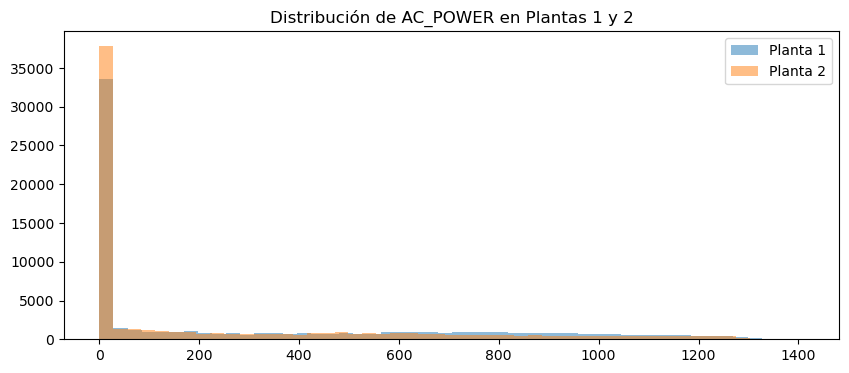

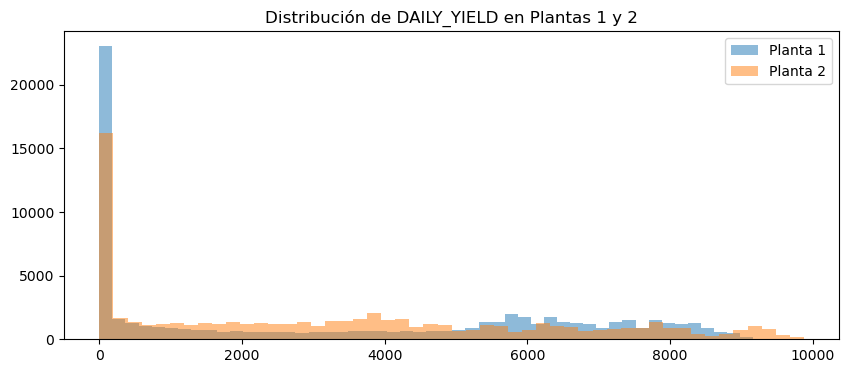

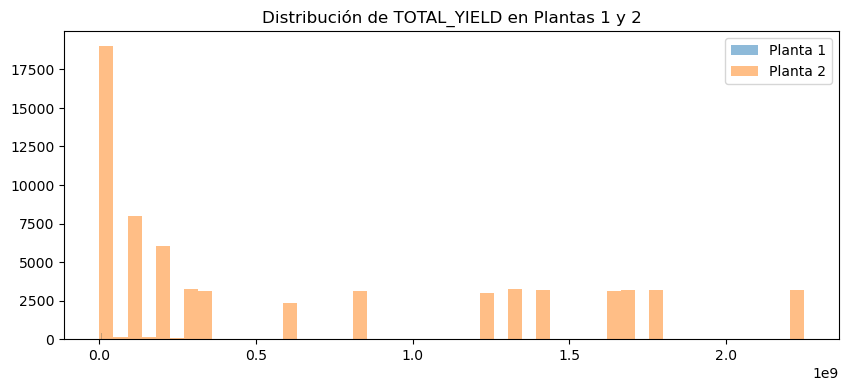

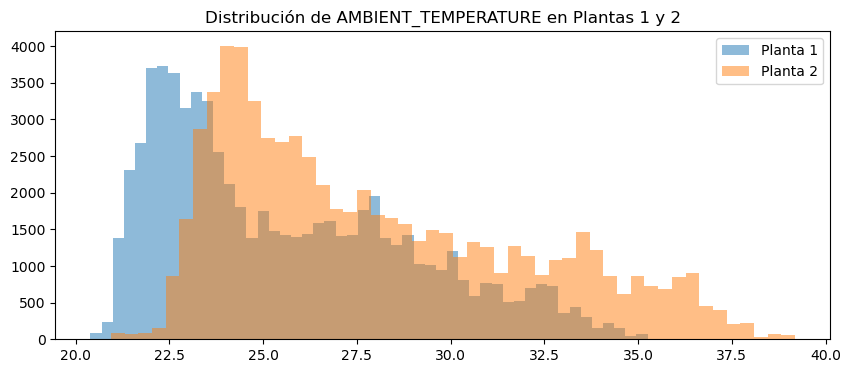

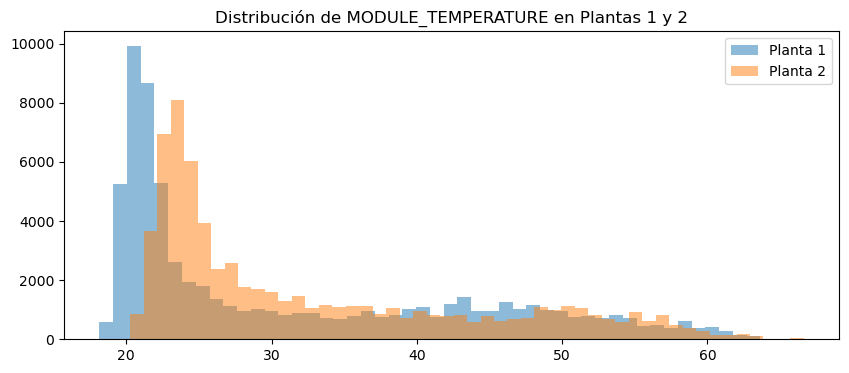

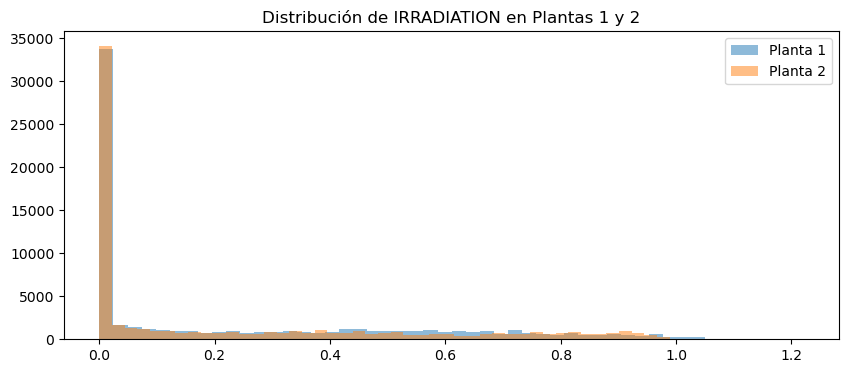

In [6]:
# Comparar histogramas de características entre las dos plantas
for feature in features:
    plt.figure(figsize=(10, 4))
    plt.hist(df_GD1_limpio[feature], bins=50, alpha=0.5, label='Planta 1')
    plt.hist(df_GD2_limpio[feature], bins=50, alpha=0.5, label='Planta 2')
    plt.title(f'Distribución de {feature} en Plantas 1 y 2')
    plt.legend()
    plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
# Concatenar características de ambas plantas
X_combined = np.vstack((df_GD1_limpio[features].values, df_GD2_limpio[features].values))
Y_combined = np.concatenate((Y_ker_plant1, Y_ker_plant2))

# Ajustar el escalador a los datos combinados de ambas plantas
scaler_combined = MinMaxScaler()
scaler_combined.fit(X_combined)

# Escalar los datos de la planta 1 y 2 con el escalador combinado
X_ker_plant1_scaled = scaler_combined.transform(df_GD1_limpio[features].values)
X_ker_plant2_scaled = scaler_combined.transform(df_GD2_limpio[features].values)

# Definir las características y variable objetivo para la planta 1
X_ker_plant1 = df_GD1_limpio[features].values
Y_ker_plant1 = df_GD1_limpio['DC_POWER'].values  # Definir la variable objetivo como en la planta 2

# Escalar los datos de la planta 1 y 2 con el escalador combinado
X_ker_plant1_scaled = scaler_combined.transform(X_ker_plant1)
X_ker_plant2_scaled = scaler_combined.transform(X_ker_plant2)


In [8]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

# Volver a compilar el modelo
Modelo_SP1.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Combinar características y variable objetivo de ambas plantas
X_combined = np.vstack((X_ker_plant1_scaled, X_ker_plant2_scaled))

# Entrenar el modelo con datos combinados
Modelo_SP1.fit(X_combined, Y_combined, epochs=50, batch_size=50, verbose=0)

# Evaluar el modelo en la planta 2 para ver si el rendimiento mejora
Y_pred_plant2_combined = Modelo_SP1.predict(X_ker_plant2_scaled)


mse_plant2_combined = mean_squared_error(Y_ker_plant2, Y_pred_plant2_combined)
mae_plant2_combined = mean_absolute_error(Y_ker_plant2, Y_pred_plant2_combined)
r2_plant2_combined = r2_score(Y_ker_plant2, Y_pred_plant2_combined)

print("Resultados en los datos de la planta 2 con modelo combinado:")
print("MSE:", mse_plant2_combined)
print("MAE:", mae_plant2_combined)
print("R²:", r2_plant2_combined)

KeyboardInterrupt: 